In [1]:
import pandas as pd
df=pd.read_csv("info.csv")
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-05T00:00:00.000Z,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,-5.0,...,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0
1,2018-01-08T00:00:00.000Z,Endeavor Air Inc.,ATL,ABY,False,False,1037,1059.0,22.0,22.0,...,1117.0,1149.0,4.0,1137,16.0,1.0,1.0,1100-1159,1,0
2,2018-01-18T00:00:00.000Z,Endeavor Air Inc.,ATL,ABY,False,False,1037,1233.0,116.0,116.0,...,1307.0,1339.0,6.0,1137,128.0,1.0,8.0,1100-1159,1,0
3,2018-01-27T00:00:00.000Z,Endeavor Air Inc.,ATL,ABY,False,False,1037,1028.0,0.0,-9.0,...,1046.0,1115.0,4.0,1136,-17.0,0.0,-2.0,1100-1159,1,0
4,2018-01-08T00:00:00.000Z,Endeavor Air Inc.,ATL,EVV,False,False,939,938.0,0.0,-1.0,...,951.0,951.0,4.0,1008,-13.0,0.0,-1.0,1000-1059,2,0


In [2]:
df.shape

(568879, 61)

In [4]:
print( len(df[df['ArrDel15'] == 1]))

108411


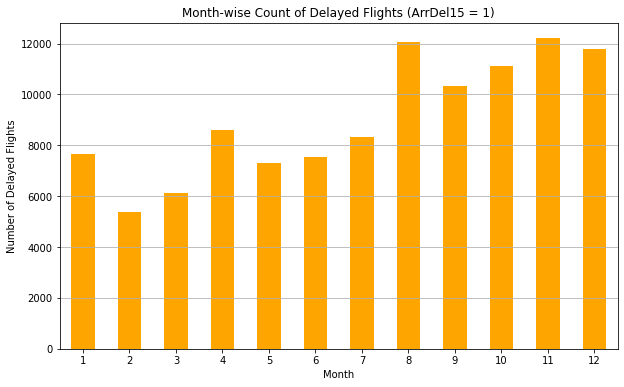

In [7]:
import matplotlib.pyplot as plt
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract month from FlightDate
df['Month'] = df['FlightDate'].dt.month

# Filter rows where ArrDel15 is 1
delayed_flights = df[df['ArrDel15'] == 1]

# Group by Month and count
monthly_delay_count = delayed_flights.groupby('Month').size()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_delay_count.plot(kind='bar', color='orange')
plt.title('Month-wise Count of Delayed Flights (ArrDel15 = 1)')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()

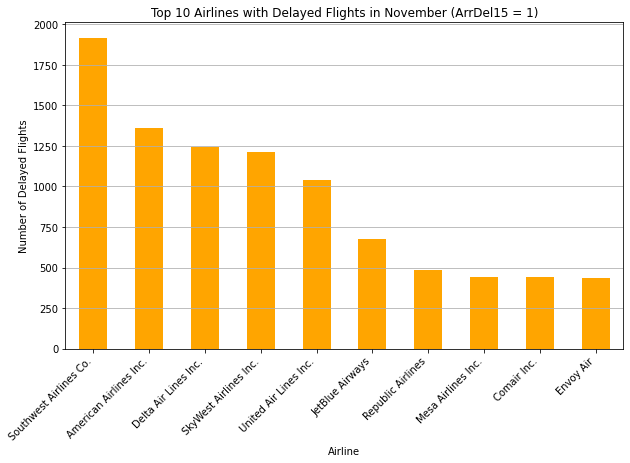

In [10]:
# Extract month from FlightDate
df['Month'] = df['FlightDate'].dt.month

# Filter rows where ArrDel15 is 1 and Month is November (11)
november_delayed_flights = df[(df['ArrDel15'] == 1) & (df['Month'] == 11)]

# Group by Airline and count the number of delayed flights, then sort in descending order and get top 10
top_10_november_delay_count_by_airline = november_delayed_flights.groupby('Airline').size().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_10_november_delay_count_by_airline.plot(kind='bar', color='orange')
plt.title('Top 10 Airlines with Delayed Flights in November (ArrDel15 = 1)')
plt.xlabel('Airline')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Display the plot
plt.show()